### Word Cloud 

#### Importing Libraries

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def plot_wc(src):
    r = requests.get(src)
    bs = BeautifulSoup(r.text)

    txt = bs.find_all("div")
    txt = [a.text for a in txt]
    txt = " ".join(txt)

    txt = re.sub("["+string.punctuation+"]"," ",txt)
    txt = re.sub("[0123456789]"," ",txt)

    tokens = word_tokenize(txt)


    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(tokens)):
        tokens[i] = wordnet_lemmatizer.lemmatize(tokens[i])

    tokens = pd.Series(tokens)
    tokens = tokens[tokens.isin(set(stopwords.words('english')))==False]
    tokens = list(tokens[tokens.str.len()>2])
    txt = " ".join(tokens)

    wc = wordcloud.WordCloud(width = 1000, height = 1000,background_color ='white',min_font_size = 10).generate(txt) 

    fig = plt.figure(figsize=(15,15))
    plt.imshow(wc)

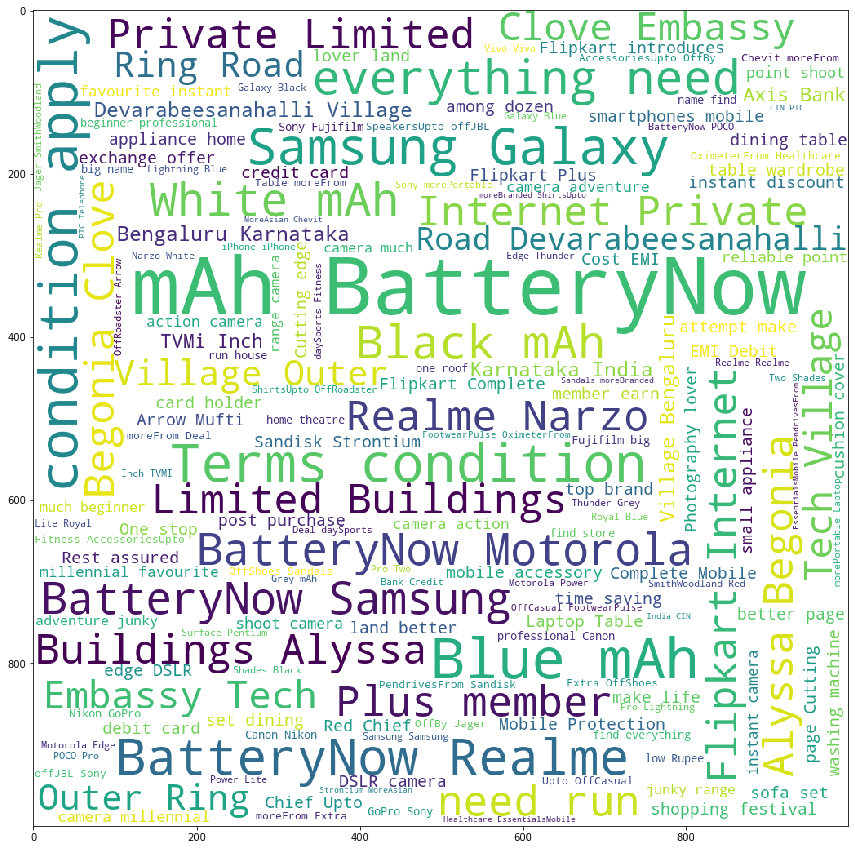

In [9]:
src = "https://www.flipkart.com"
plot_wc(src)

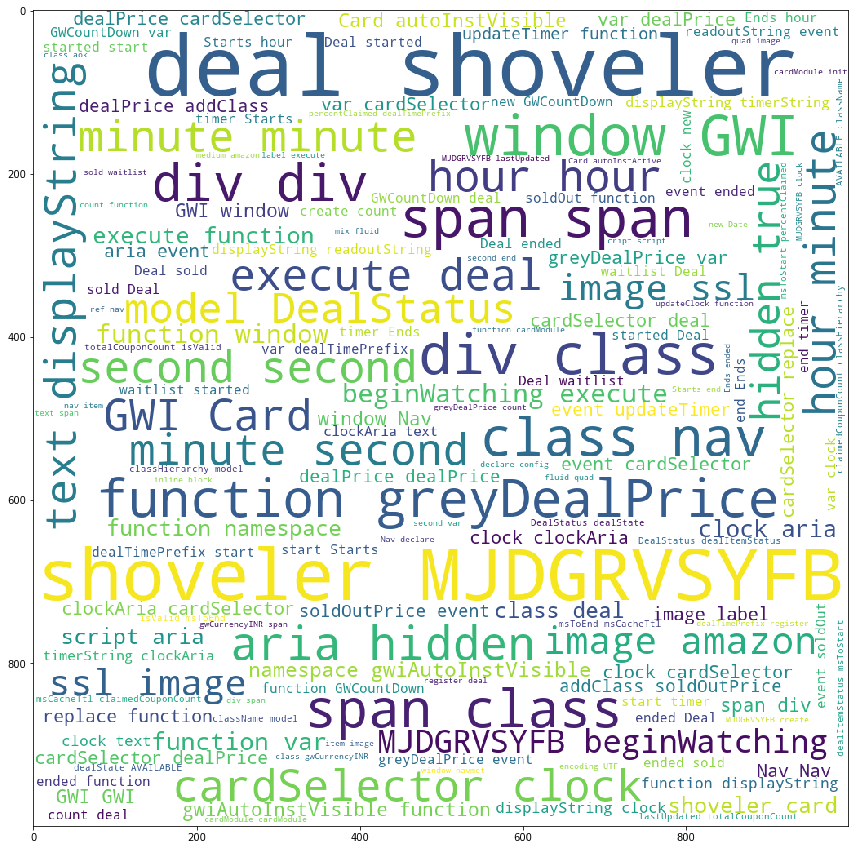

In [8]:
src = "https://www.amazon.in"
plot_wc(src)

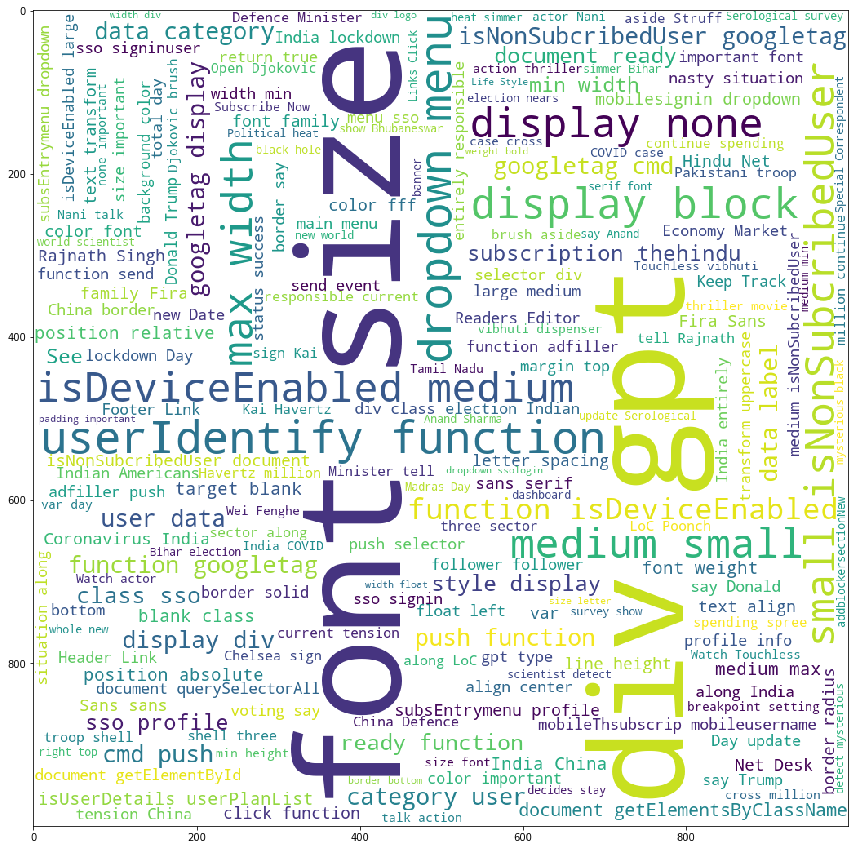

In [7]:
src = "https://www.thehindu.com"
plot_wc(src)

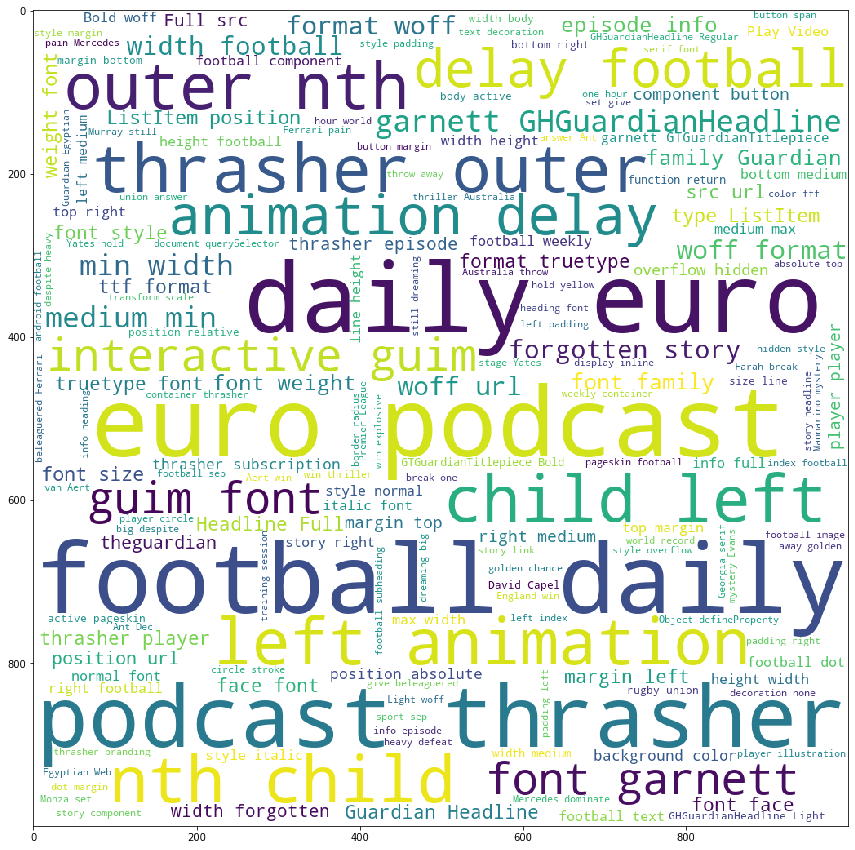

In [10]:
src = "https://www.theguardian.com/uk/sport"
plot_wc(src)

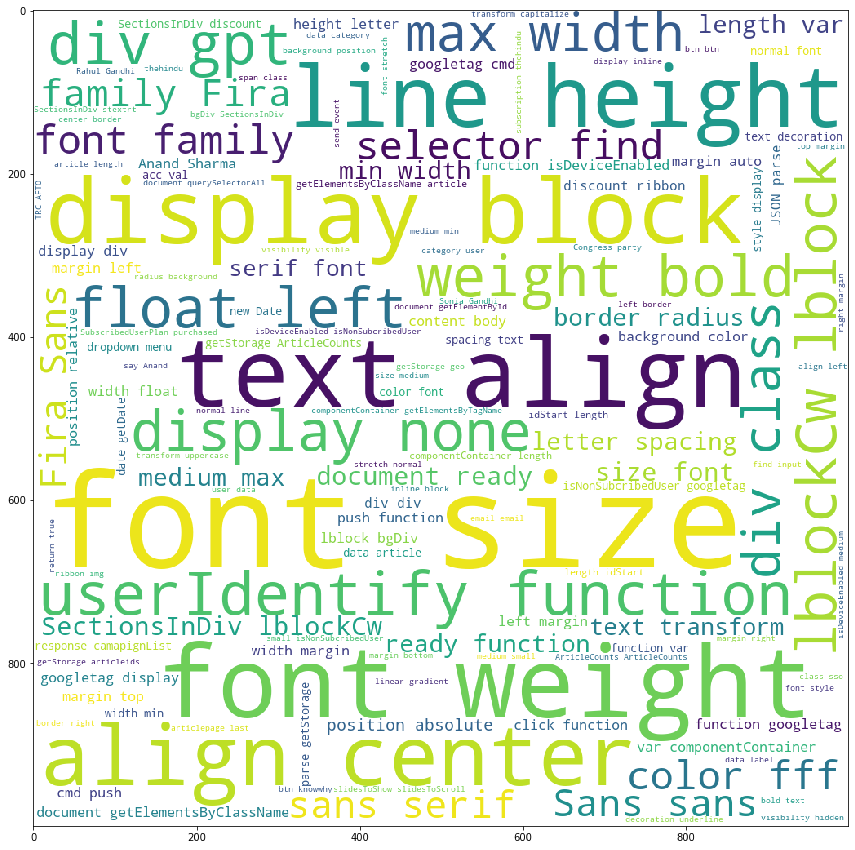

In [11]:
src = "https://www.thehindu.com/news/national/we-are-neither-dissenters-nor-rebels-but-reformists-says-anand-sharma/article32524262.ece?homepage=true"
plot_wc(src)

In [ ]:
src = "https://www.amazon.in/"
plot_wc(src)

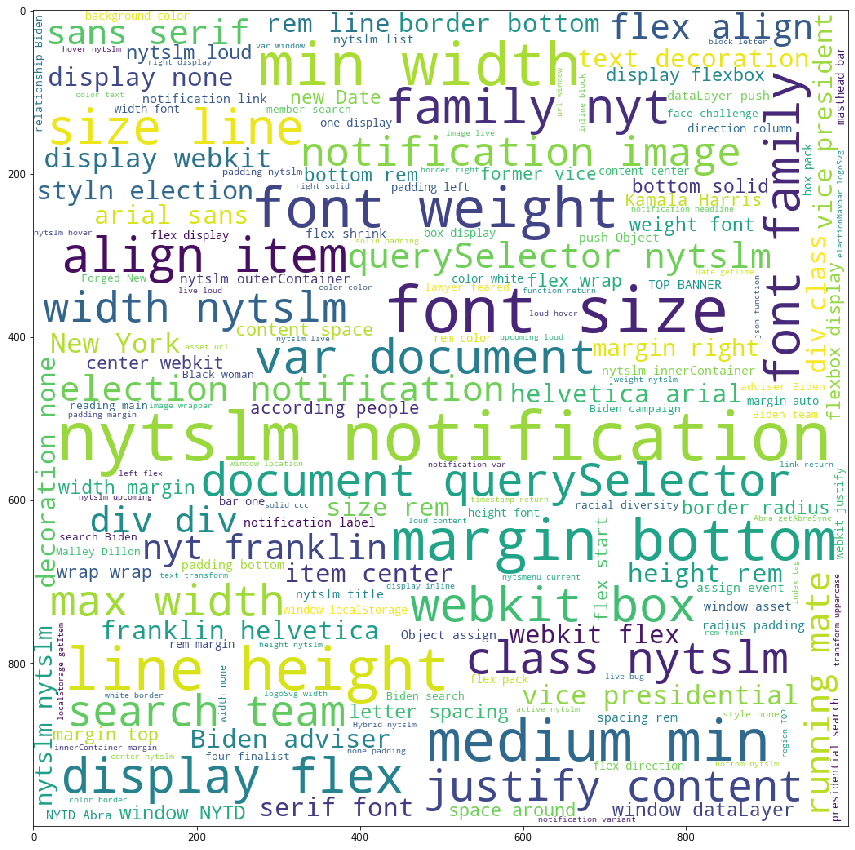

In [16]:
src = "https://www.nytimes.com/2020/08/13/us/politics/biden-harris.html"
plot_wc(src)